(A) Identification of Candidate Datasets

Identify three candidate datasets. For each dataset, provide:
- Dataset name and source – Ex: Online Retail Dataset
- Course topic alignment – Ex: Frequent itemsets and association rule mining
- Potential beyond-course techniques – Ex: Sequential pattern mining not covered in lecture
- Dataset size and structure – Ex: 500K transactions, variable-length item baskets
- Data types – Ex: Transaction IDs, item IDs, timestamps
- Target variable(s), if any – Exs: None (unsupervised pattern mining), Engagement, Price
- Licensing or usage constraints – Ex: CC License

Candidate Datasets:  
1. RuleArena
- Source: https://github.com/skyriver-2000/rulearena
- Course topic alignment:
    - Frequent Itemset Mining
    - Text Mining
    - Anomaly Detection
- Potential beyond-course techniques:
    - Logic Path Mining (verifying steps of model reasoning instead of just output)
- Dataset size and structure:
    - Gathered rules and problems across three domains (~100 rules, ~1000 problems)
        - Airline:
            - Rules: Fee tables as CSVs and natural language rules in reference txts.
            - Prompt/Ground truth: Natural language questions and equivalent dictionary/object representation stored as rows in json.
        - NBA:
            - Rules: Natural language rules in reference txt.
            - Prompt/Ground truth: List of transactions represented as dictionaries stored in json.     
        - Tax:
            - Rules: Hardcoded tax forms in python files.
            - Prompt/Ground Truth: List of dictionaries containing taxpayer information and matching serialized pydantic object stored in json.
        
- Data types:
    - Airline:
        - Passenger identifiers: name (string)
        - Monetary values: base_price (integer, USD)
        - Passenger attributes: customer_class (string: "Main Cabin", "Business", "First", etc.), routine (string: "U.S.", "Canada", "Colombia"), direction (integer: 0 or 1)
        - Bag identifiers: id (integer)
        - Bag attributes: name (string: "backpack", "luggage box"), size [length, width, height] (array of integers, inches), weight (integer, lbs)
    - NBA:
        - Metadata: n_teams (integer), n_players (integer), n_operations (integer)
        - Team info: team_situations (list of strings describing salary totals)
        - Player info: player_situations (list of strings with draft pick year, contract details, accolades)
        - Operations: operations (list of strings describing sign-and-trade/salary cap moves)
        - Labels: answer (boolean), illegal_operation (string: "A", "B", etc.), problematic_team (string: team identifier)
        - Rules: relevant_rules (list of strings: rule identifiers/names like "salary_cap_no_exceed_without_exception")
    - Tax:
        - Personal identifiers: name (string), age (integer)
        - Tax status: filing_status (string), itemized (boolean), blind (boolean), num_qualifying_children (integer), num_other_dependents (integer)
        - Income sources: wage_tip_compensation (integer), household_employee_wage (integer), unreported_tip (integer), taxable_interest (integer), qualified_dividends (integer), ordinary_dividends (integer), taxable_ira_distributions (integer), taxable_pensions (integer), taxable_social_security_benefits (integer)
        - Dependent/Schedule info: child_and_dependent (boolean), self_employed (boolean), student info (if applicable)
        - Monetary totals: all computed from forms (line totals, deductions, taxes, credits)
- Target variable(s):
    - Airline:
        - Numeric target: total baggage fee cost (USD).

    - NBA:
        - Boolean target: whether a proposed operation is legal (true/false);
        - Multi-label taget: rule application matching (comparing LLM-extracted rules to relevant_rules).

    - Tax:
        - Numeric target: total tax owed or overpaid (USD);

- Licensing or usage constraints: MIT License


2. HiDF
- Source: https://zenodo.org/records/16140829
- Course topic alignment:
    - Clustering
    - Anomaly Detection
- Potential beyond-course techniques:
    - Principal Component Analysis (image/video embeddings)
- Dataset size and structure:
    - 62K jpg images and 8K mp4 videos, all with metadata.
- Data types:
    - Metadata (subject attributes):
        - Race (nominal string), gender (nominal string), age (ordinal string)
    - Image/Video:
        - Nominal value: base_image/video_id and targe_image/video_id  
- Target variable(s):
    - Boolean target: real/fake.
- Licensing or usage constraints: Creative Commons Attribution-NonCommercial 4.0 International  

3. EmoryNLP
- Source: https://github.com/emorynlp/emotion-detection
- Course topic alignment:
    - Text Mining
    - Frequent Itemset Mining
    - Clustering
- Potential beyond-course techniques:
    - Entity-Centric Mining (creation of emotional profile per-character rather than per utterance)
- Dataset size and structure:
    - 12K labeled utterances organized hierarchically by scene and episode stored in a json.
- Data types:
    - Ids: episode_id, scene_id, utterance_id, nominal values as string
    - Speakers: nominal values as string
    - Transcript/tokens: natural language a string(s)
    - Emotion: nominal value as string
- Target variable(s):
    - Nominal target: emotion label.
- Licensing or usage constraints: Apache License

(B) Comparative Analysis of Datasets

Compare the three datasets with respect to both data properties AND course vs external techniques.


Supported data mining tasks:
- Rule Arena:  
    - Course:
        - Text Mining: Parsing natural language rules into logic rules.
        - Frequent Itemset Mining: Identify rules that are often violated together.
        - Anomaly Detection: Flagging illegal transactions and the rule broken.
    - External:
        - Logic Path Mining: The LLM uses Chain-of-Thought Reasoning; these logical sequences can be mined to verify the decision and process.
- HiDF:  
    - Course:
        - Clustering: Grouping deepfakes by similar characteristics may simultaneously cluster anomalous patterns that can be detected.
        - Anomaly Detection: The identification of anomalies in the pixel distribution/pattern will be the primary approach for classification.
    - External:  
        - PCA: The compression/encoding of the data will be necessary for compatibility with CV models.
- EmoryNLP:
    - Course:
        - Text Mining: Mapping the natural language to specific emotions.
        - Frequent Itemset Mining: Finding co-occuring emotions may be helpful for influencing classification probabilities.
        - Clustering: Utterances (or rather their encoding) will like be classified by similarity to classified emotion embeddings.
    - External:
        - Entity-Centric Profiling: Aggregating emotions by character could reveal global patterns that will assist in utterance classification.

Data quality issues:
- Rule Arena: The three domains store data in a different structure. And, even within a given domain, the data is fragmented across several files, each with its own format. This will require significant, customized preprocessing before standard techniques can be applied.
- HiDF: The real images come from CelebA-HQ and Flickr-Faces-HQ and have been curated to only select images with the face clear and unobstructed. It is possible that any models applied to this dataset will learn to recognize the criteria applied to the original dataset and the selections from them rather than the underlying pixel patterns.
- EmoryNLP: The distribution of emotions is likely not uniform. Specifically, the inclusion of "Neutral" emotion may dominate results and cause issues with a local minima misclassifying all samples to the plurality case. This may require more selective sampling (not disimilar to negative sampling).

Algorithmic feasibility
- Rule Arena:
    - The dataset is relatively small, so there are not bottlenecks related to time complexity/computation time. The issue is again that the data must be preprocessed to a standard format; afterwards, even naive/exhaustive algorithms will likely be effective. Both text mining, frequency itemset mining, and anomaly detection algorithms should run without issue.
- HiDF:
    - Images suffer from their extremely high resolution and multi-dimensional nature. Hence the need for PCA (or some other dimension reduction). This fortunately naturally lends itself to standard clustering approaches. In regards to Anomaly detection, whatever embedding that is generated must capture these anomalous patterns as comparing pixel-by-pixel patterns across >50K images is not viable.
- EmoryNLP:
    - This dataset is both well structured and has reasonable dimension. The length of utterances varies, but many will be sufficiently long for text mining. Similarly, many scenes are sufficiently long for frequent itemset mining across emotions; however, it is unclear whether the variety of emotions within a given scene will be sufficient for any meaningful results. Clustering deals more with the outputted embedding which can be easily obtained via any encoding model.
    
Bias considerations:  
- RuleArena: Systemic bias. Because the rules originate from real world systems. Some rules are more "generous" than other rules. These may lead to the LLM not truly understanding a rule, but, since that rule isn't strict, the final output is correct. This will prevent perfect verification of the LLMs "understanding" of the process and the rules it's applying.
- HiDF: Sampling bias. As mentioned previously, the real photos are curated for a specific features which are not representative of the real population. Additionally, the generative models used to create the deepfakes likely have biases from the biases that occured during training (ie must people smile in photos), these biases will likely also be present in the generated images.
- EmoryNLP: Sampling bias. All utterances are taken from the TV show friends. Any interpretations may be a better representation of the select group of writers or the sitcom genre rather than real-world conversations.

Ethical considerations
- Rule Arena: If the analysis verifies that LLMs are capable of performing this reasoning at a high level and leads to the implementation of LLMs in this capacity, this could lead to a stricter, more "robotic" execution of these regulations in the respective domains, lacking the nuance that a human is more likely to include.
- HiDF: Similar to malware detectors, an effective deepfake detector will eventually result in better deepfake generators, helping potentially malicious actors learn the weaknesses of existing models.
- EmoryNLP: The model could be used as a way to perform "self-supervised" learning for LLMs focusing on generating scripts with emotional complexity. If these attempts are successful, human writers would likely be affected.

(C) Dataset Selection

Select one dataset and justify the choice

Selection: HiDF (specifically the images)
Reasons:
- It's an extremely relevant (and likely to become even more so) problem.
- The modality is high-dimensional which will require more selective algorithm choice and/or focused (meaning customized for the task) embeddings. And, in general, images will require a more "beyond-the-course" approach than traditional data.
    - I am also in a computer vision course and hope that this intersection will help me effectively utilize the data format and move the project beyond traditional/surface-level approaches.
- It's the largest dataset by a significant margin. Additionally, the data is well organized which will allow more time to be spent on actual datamining techniques rather than preprocessing.
- I specifically chose to work specifically images (exclude video) to ensure a reasonable scope for an in-depth project. Since, videos can be decomposed into images, the results will likely still be applicable (which is less likely to be the case if I had worked with only video).
- In regards, to course content, I am curious to see how anomaly detection can be applied, specifically, with how an anomaly is defined in the context of pixels.

Trade-offs:
- Especially in comparison to the other datasets, there is a lack of variety of data types. Specifically, there is no natural language and the nominal/ordinal metadata is significantly less complex and varied.
- The larger dataset and high-dimensionality of the data will likely require longer computation time or better hardware (even when considering dimensionality-reduction techniques).

(D) Exploratory Data Analysis (Selected Dataset Only)

Perform EDA – Ex:
- Distribution of basket sizes
- Frequency of top items
- Sparsity of item co-occurrence
- Temporal gaps between transactions
- Initial observations motivating external techniques

In [3]:
import os, urllib.request, zipfile, shutil
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.ndimage import sobel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from cv2 import resize, INTER_AREA

In [4]:
# Setup dataset in environment
BASE_PATH = '/content'
MOUNT_PATH = BASE_PATH + '/drive'
FOLDER_PATH = MOUNT_PATH + '/MyDrive/DataMining/project_dataset'
REAL_IMG_PATH = 'https://zenodo.org/records/16140829/files/Real-img.zip?download=1'
FAKE_IMG_PATH = 'https://zenodo.org/records/16140829/files/Fake-img.zip?download=1'
METADATA_PATH = 'https://zenodo.org/records/16140829/files/metadata.csv?download=1'

# Helpers
def download_dataset(url, to_path):
    print(f"Downloading from {url} ...")
    urllib.request.urlretrieve(url, to_path)
    size = os.path.getsize(to_path) / (1024*1024)
    print(f"Saved to {to_path} ({size:.2f} MB)")

    # Test:
    assert os.path.exists(to_path)

def load_dataset(path):
    with zipfile.ZipFile(path, 'r') as zip:
        print(f"Extracting {path} ...")
        zip.extractall('/content')

# Mount drive
if not os.path.ismount(MOUNT_PATH):
    drive.mount(MOUNT_PATH)

# Create folder if needed
if not os.path.exists(FOLDER_PATH):
    os.mkdir(FOLDER_PATH)

# Download dataset (if needed)
url_list = [REAL_IMG_PATH, FAKE_IMG_PATH, METADATA_PATH]
file_list = []
for url in tqdm(url_list):
    file_path = FOLDER_PATH + '/' + url.split('/')[-1].split('?')[0]
    if not os.path.exists(file_path):
        download_dataset(url, file_path)
    file_list.append(file_path)

# Load dataset
for file_path in tqdm(file_list):
    if file_path.endswith('.zip'):
        load_dataset(file_path)
    else:
        shutil.copy(file_path, BASE_PATH)

# Test all three files/folders exist in "local" environment memory
assert os.path.exists(BASE_PATH + '/Real-img')
assert os.path.exists(BASE_PATH + '/Image')
assert os.path.exists(BASE_PATH + '/metadata.csv')

  0%|          | 0/3 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/DataMining/project_dataset/Real-img.zip ...


 33%|███▎      | 1/3 [10:07<20:14, 607.29s/it]

Extracting /content/drive/MyDrive/DataMining/project_dataset/Fake-img.zip ...


100%|██████████| 3/3 [14:22<00:00, 287.52s/it]


Class and Metadata distribution:  
Before performing any costly crunching of the images. We should analyze whether there is any abnormal relationships between metadata (Base/Swap, Race, Gender, and/or Age) value distributions and the fake images. This is important for a couple reasons. Firstly, if a subset of base/swap images are extremely overrepresented in the fake images, then the model may overfit to that subset of images being fake. For example, if pictures of elderly people make up a larger percentage of the swap images for deepfakes than they make up of the real images, then the model may begin to assume all images of elderly people are deepfakes, regardless of actual pixel features. Secondly, even if the distribution between real and fake images per metadata value is equal, if some metadata values are rarer across both corpuses, the model may not be able to generalize effectively across all groups. For example, if the corpus was mostly asian men, then the model will spend the majority of the training on samples of asian men and may reach a local minimum that maximizes accuracy for plurality but sacrifices accuracy for a less represented group. This is especially problematic in the context of Anomaly detection which must define a normal to define the anomalies.

In [5]:
FAKE_IMG_FOLDER = BASE_PATH + '/Image'
REAL_IMG_FOLDER = BASE_PATH + '/Real-img'

# Helper get base and swap
def get_base_swap(file_name):
    ids = file_name.split('.')[0].split('_')
    return [id.strip() for id in ids]

# Read in metadata
metadata_df = pd.read_csv(BASE_PATH + '/metadata.csv')

# Count across all Image
base_counter = dict()
swap_counter = dict()
age_counter = dict()
gender_counter = dict()
race_counter = dict()
error_counter = 0

fake_img_list = os.listdir(FAKE_IMG_FOLDER)
for fake_img in tqdm(fake_img_list):
    # Get base/swap real image ids
    base_id, swap_id = get_base_swap(fake_img)

    try:
        # Get metadata
        metadata_row = metadata_df.loc[metadata_df['ID'] == swap_id]
        age = metadata_row['Age'].iloc[0].strip()
        gender = metadata_row['Gender'].iloc[0].strip()
        race = metadata_row['Race'].iloc[0].strip()

        # Update counters
        base_counter[base_id] = base_counter.get(base_id, 0) + 1
        swap_counter[swap_id] = swap_counter.get(swap_id, 0) + 1
        age_counter[age] = age_counter.get(age, 0) + 1
        gender_counter[gender] = gender_counter.get(gender, 0) + 1
        race_counter[race] = race_counter.get(race, 0) + 1

    except:
        print(base_id, swap_id, metadata_row)
        error_counter += 1

# Tests
assert len(metadata_df) == 42901
assert error_counter < len(fake_img_list) * 0.01
assert sum(base_counter.values()) == len(fake_img_list) - error_counter
assert sum(swap_counter.values()) == len(fake_img_list) - error_counter
assert sum(age_counter.values()) == len(fake_img_list) - error_counter
assert sum(gender_counter.values()) == len(fake_img_list) - error_counter
assert sum(race_counter.values()) == len(fake_img_list) - error_counter

 13%|█▎        | 3983/31249 [00:21<02:38, 172.00it/s]

f33692 31999 Empty DataFrame
Columns: [ID, Img/Vid, Base/Swap, Race, Gender, Age]
Index: []


 38%|███▊      | 11825/31249 [01:03<01:26, 223.53it/s]

f36700 34972 Empty DataFrame
Columns: [ID, Img/Vid, Base/Swap, Race, Gender, Age]
Index: []


 60%|██████    | 18801/31249 [01:41<01:43, 120.48it/s]

f00456 f9568 Empty DataFrame
Columns: [ID, Img/Vid, Base/Swap, Race, Gender, Age]
Index: []


 95%|█████████▌| 29825/31249 [02:42<00:07, 196.74it/s]

f40593 F24621 Empty DataFrame
Columns: [ID, Img/Vid, Base/Swap, Race, Gender, Age]
Index: []


100%|██████████| 31249/31249 [02:49<00:00, 184.58it/s]


,avg,stdev,Count > 1,Percent > 1
Base Image Uses,1.012213,0.110131,753.0,0.024394
Swap Image Uses,1.089017,0.860259,3795.0,0.122943


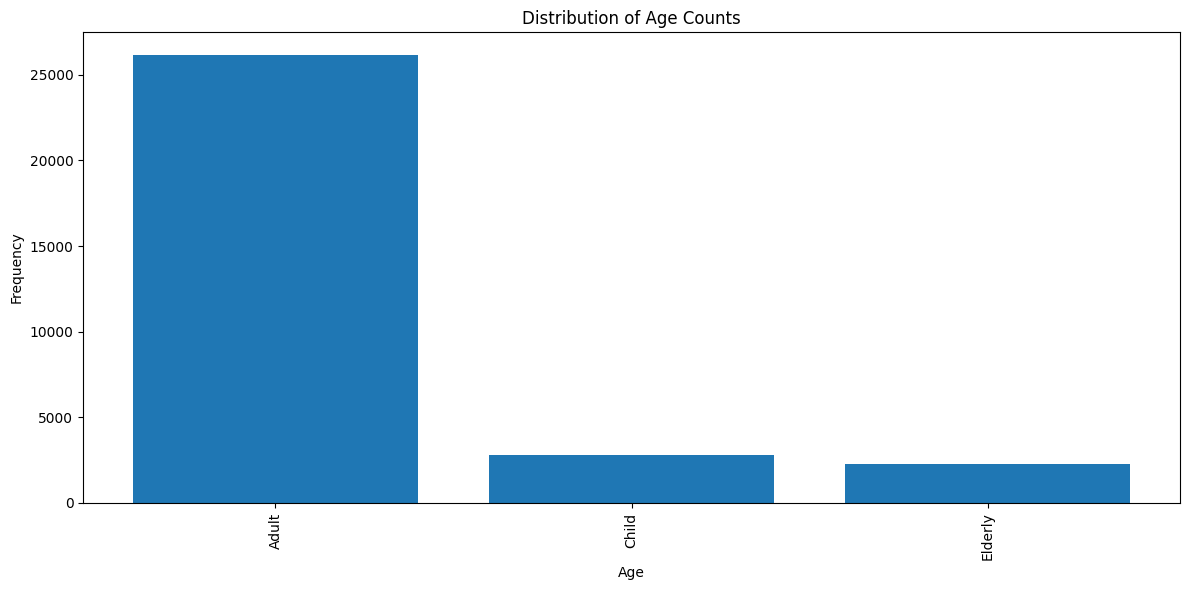

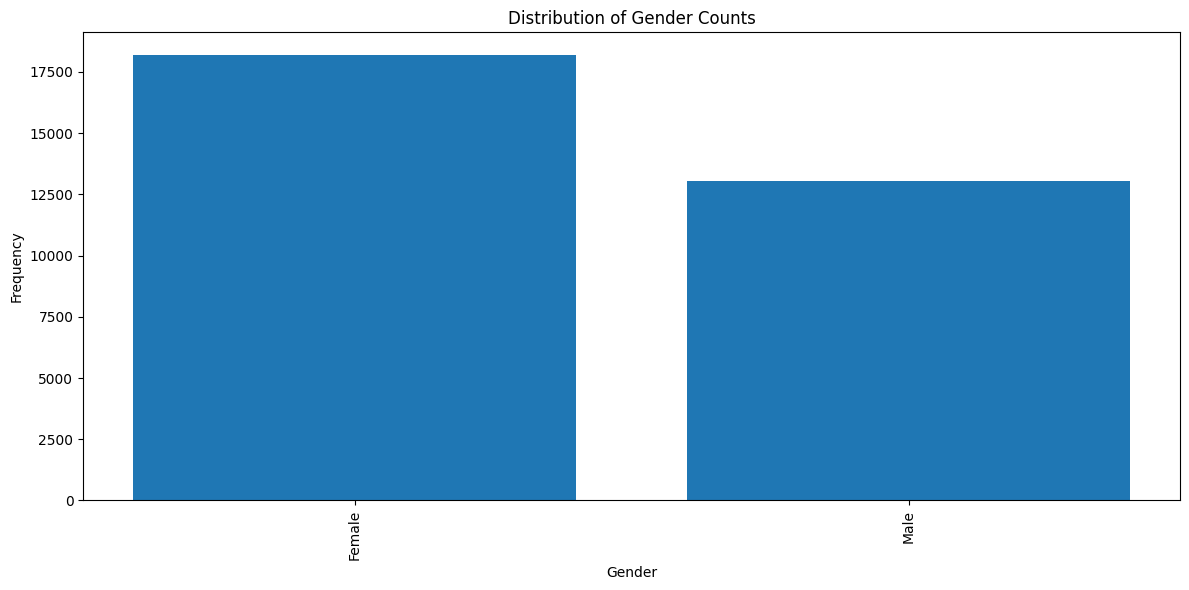

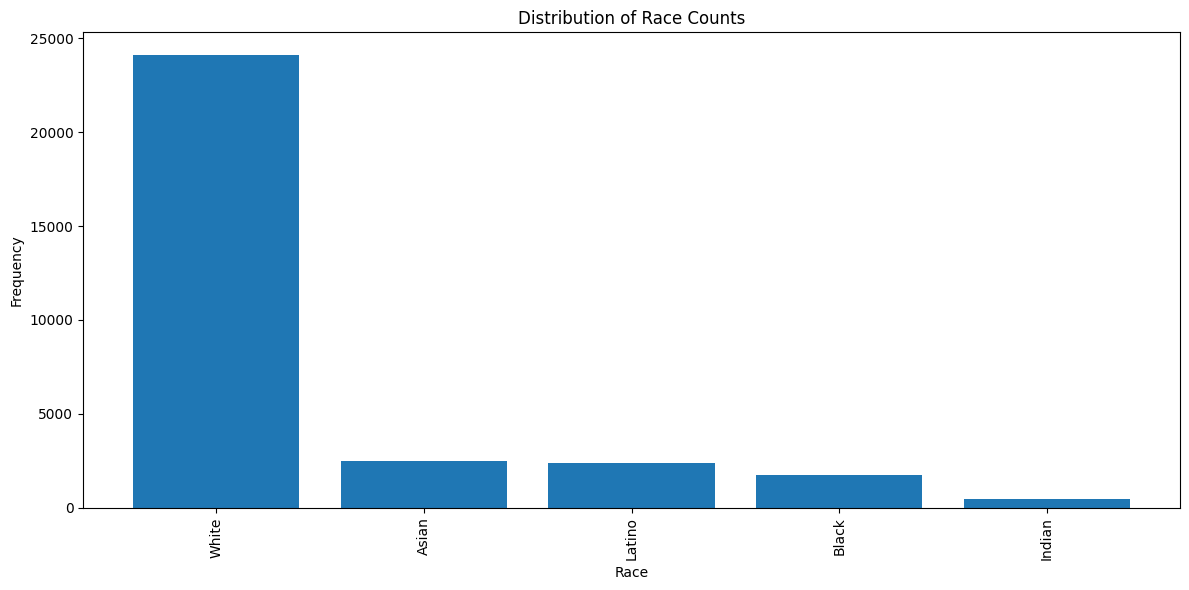

In [6]:
# Graph helpers
def bar_helper(counter_dict, title, xlabel, ylabel='Frequency'):
    # Format counter
    items = sorted(counter_dict.items(), key=lambda x: x[1], reverse=True)
    labels, counts = zip(*items)

    # Graph
    plt.figure(figsize=(12,6))
    plt.bar(labels, counts)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# Calculate distribution of base/swap images usage
base_uses = np.array(list(base_counter.values()))
swap_uses = np.array(list(swap_counter.values()))
metadata_measurements = {
    'Base Image Uses': {
        'avg': base_uses.mean(),
        'stdev': np.std(base_uses),
        'Count > 1': base_uses[base_uses > 1].sum(),
        'Percent > 1': base_uses[base_uses > 1].sum() / len(base_uses)
    },
    'Swap Image Uses': {
        'avg': swap_uses.mean(),
        'stdev': np.std(swap_uses),
        'Count > 1': swap_uses[swap_uses > 1].sum(),
        'Percent > 1': swap_uses[swap_uses > 1].sum() / len(base_uses)
    },
}
display(pd.DataFrame(metadata_measurements).T)

# Graph distribution of non-id metadata
bar_helper(age_counter, title='Distribution of Age Counts', xlabel='Age')
bar_helper(gender_counter, title='Distribution of Gender Counts', xlabel='Gender')
bar_helper(race_counter, title='Distribution of Race Counts', xlabel='Race')

When reviewing base image usage, we see a very uniform usage: average usage count is about 1 with a low standard deviation and only 2.5% of images being used as a base more than once. Swap image usage is somewhat less uniform, but the average is still roughly 1; however, the standard deviation does considerably spike to about 8x the base image usage with about 12% of swap images being used more than once. Since the average is still low this is not very problematic, but, assuming these high-usage swap images are evenly randomly distributed, may excarebate any issues with skewed metadata distributions.  
And we do see this un-uniform distribution across all metadata features. This is likely a result of bias in the original sources of the real images: celebrity pictures and curated Flickr. Celebrities are obviously disproprotionally white adults and it's possible the selection from Flickr is similarly affected due to high resolution photography having a monetary barrier of entry. Following what was previously mentioned, data and computation time will disproportionally favor white adults which could affect generalization. Because the disparity is so large, we cannot normalize the dataset without gathering many pictures or removing a large majority. Therefore, we should instead be sure to evaluate the models performs by subgroup as well as overall. This will indicate whether the model has effectively generalized.

Now, we can move to global measurements of the pixel values themselves. Similarly we want to determine if there are any disparities between the real and fake datasets. Since we know that the distributions of real to fake images match fairly closely in terms of usage and therefore metadata, these disparities would be effective "rule-of-thumb" methods to identify deepfakes or potential features that should be included in the model. However, overly relying on these features is self-defeating because, as mentioned previously, malicious actors can very easily overcome this approach, making the model quickly outdated. In fact, for some disparities, we should attempt to normalize instead of using it as a feature.

In [5]:
def convert_to_grayscale(img):
    if img.max() > 1:
        img /= 255.0

    if img.ndim == 2:
        return img

    img = img[..., :3] # Handle RGBA case
    return img.sum(axis=2) / 3

def get_img_stats(img):
    img = convert_to_grayscale(img)
    stats = {}

    # Intensity
    stats["intensity_avg"] = img.mean()
    stats["intensity_std"] = img.std()
    stats["intensity_skew"] = skew(img[::4, ::4], axis=None) # Downsample for speed, shouldn't impact result
    stats["intensity_kurt"] = kurtosis(img[::4, ::4], axis=None)

    # Gradient
    gx = sobel(img, axis=0)
    gy = sobel(img, axis=1)
    g = np.sqrt(gx**2 + gy**2)
    stats["grad_avg"] = g.mean()
    stats["grad_std"] = g.std()

    return stats

# Aggregate stats for fake images
img_stats = []
error_counter = 0
for fake_img in tqdm(fake_img_list):
    try:
        fake_img_stats = get_img_stats(plt.imread(FAKE_IMG_FOLDER + '/' + fake_img).astype(float).copy())
        fake_img_stats['label'] = 'fake'
        img_stats.append(fake_img_stats)
    except:
        print(fake_img)
        error_counter += 1

# Aggregate stats for real images
real_img_list = os.listdir(REAL_IMG_FOLDER)
for real_img in tqdm(real_img_list):
    try:
        real_img_stats = get_img_stats(plt.imread(REAL_IMG_FOLDER + '/' + real_img).astype(float).copy())
        real_img_stats['label'] = 'real'
        img_stats.append(real_img_stats)
    except:
        print(real_img)
        error_counter += 1

# Combine stats
img_stats_df = pd.DataFrame(img_stats)
display(img_stats_df.groupby("label").mean())

# Tests
assert error_counter < (len(fake_img_list) + len(real_img_list)) * 0.01
assert len(img_stats) == len(fake_img_list) + len(real_img_list) - error_counter

 14%|█▎        | 4296/31249 [11:24<1:32:49,  4.84it/s]

c01524_c01466.jpg


 34%|███▎      | 10472/31249 [27:57<38:56,  8.89it/s]

c22708_c21941.jpg


 50%|████▉     | 15525/31249 [41:27<28:40,  9.14it/s]

c14308_c14239.jpg


100%|██████████| 38582/38582 [1:45:41<00:00,  6.08it/s]


,intensity_avg,intensity_std,intensity_skew,intensity_kurt,grad_avg,grad_std
label,,,,,,
fake,0.442362,0.232453,0.067727,-0.781461,0.097520,0.141978
real,0.440681,0.233268,0.088516,-0.768300,0.110716,0.155762


/tmp/ipython-input-1084904199.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fake_grad, real_grad], labels=["fake", "real"])


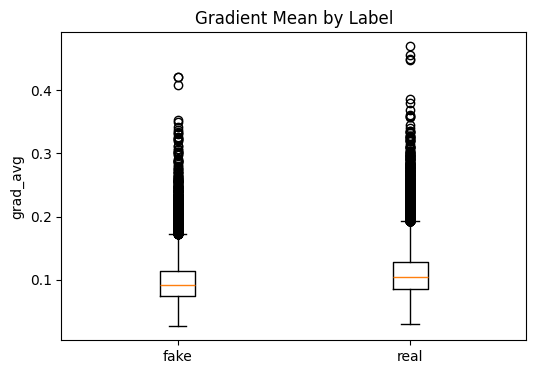

In [10]:
# Box plots of average gradient
fake_grad = img_stats_df[img_stats_df.label == "fake"]["grad_avg"]
real_grad = img_stats_df[img_stats_df.label == "real"]["grad_avg"]

plt.figure(figsize=(6,4))
plt.boxplot([fake_grad, real_grad], labels=["fake", "real"])
plt.title("Gradient Mean by Label")
plt.ylabel("grad_avg")
plt.show()

The values for intensity are very extremely close between the two subsets of images. Their average intensity and standard deviation differs by < 0.005. The shape of the distribution is also very similar as shown by the matching skew/kurtosis measurements, indicating that images consists of slightly more dark pixels than bright with the distribution being somewhat flatter/uniform. The exact values of these statistics are not very important beyond their matching across the subsets. Because these discrepancies are very easy to correct (even by deterministic methods like white balancing or histogram equalization), if we had detected any significant bias we would have performed normalization to prevent the model from relying on these patterns.  
We see a more significant difference in the average gradient across all images with about a 12% decrease from real to fake images and a similar decrease of about 9% in the standard deviation. This can be seen visually in the box plots by the slight shift between the median values. This indicates that the generation process likely has some smoothing artifacts. While these measures could be equalized by applying the appropriate sharpening filtering to every fake image, it is likely that this smoothing is not global (relative to a given image) but instead focuses on the "stitching" around where the face swap occurs, so sharpening globally may not be effective. Additionally, if this disparity is actually localized to these "stitches" it is likely that this is a significant hint for what type of anomalies we may be looking to detect. This assumption is backed up by the the a number of high-frequency outliers which likely indicates that some backgrounds are more "busy," meaning any analysis will have to go beyond simple global thresholding.

Finally I want to analyze the effectiveness of using PCA, ie how much information can be preserved after compressing the data. This is especially important considering the already long runtimes for relatively simple algorithms. The raw dimensionality of images is simply too high for a substantial dataset to be handled without some form of dense embedding. If we can effectively reduce dimension without significantly erasing the signal, this will not only reduce computation time but also the output embedding will naturally lend itself to clustering.  
Specifically we will analyze the optimal input resolution for maintaining variance and reducing dimensionality. As the input resolution decreases, we are looking for the "sweet spot" where we can capture (and even highlight) the patterns separating the real/fake images and minimize dimensionality.  

In [9]:
np.random.seed(67) # For reproducibility

RESOLUTIONS = [32, 64, 128, 256]
SAMPLE_SIZE = 250  # Number of images per class (for computational feasibility)
NUM_COMPONENTS = 128

pca_results = {}
for resolution in RESOLUTIONS:
    print(f"Analyzing PCA Efficacy at {resolution}")

    # Populate uncompressed vector
    error_counter = 0
    pixels = []
    fake_samples = np.random.choice(fake_img_list, SAMPLE_SIZE)
    real_samples = np.random.choice(real_img_list, SAMPLE_SIZE)
    for i in tqdm(range(SAMPLE_SIZE)):
        try:
            # Get fake image
            fake_sample = fake_samples[i]
            fake_img = convert_to_grayscale(plt.imread(FAKE_IMG_FOLDER + '/' + fake_sample).astype(float).copy())
            fake_img_resized = resize(fake_img, (resolution, resolution), interpolation=INTER_AREA)

            # Get real image
            real_sample = real_samples[i]
            real_img = convert_to_grayscale(plt.imread(REAL_IMG_FOLDER + '/' + real_sample).astype(float).copy())
            real_img_resized = resize(real_img, (resolution, resolution), interpolation=INTER_AREA)

            # Add pixels
            pixels.append(fake_img_resized.flatten())
            pixels.append(real_img_resized.flatten())

        except:
            print(fake_sample, real_sample)
            error_counter += 1
            continue

    # Normalize
    normalized_pixels = StandardScaler().fit_transform(np.array(pixels))

    # Run PCA
    pca = PCA(n_components=NUM_COMPONENTS)
    pca.fit(normalized_pixels)

    pca_results[resolution] = {
        'variance': pca.explained_variance_ratio_,
        'cumulative': np.cumsum(pca.explained_variance_ratio_)
    }

# Tests
assert error_counter < SAMPLE_SIZE * 2 * 0.01
assert len(pca_results) == len(RESOLUTIONS)
for resolution in RESOLUTIONS:
    var = pca_results[resolution]['variance']
    assert np.all(var >= 0)
    assert np.all(np.diff(var) <= 0)
    cum_var = pca_results[resolution]['cumulative']
    assert np.all(cum_var <= 1 + 1e-9)
    assert np.all(np.diff(cum_var) >= -1e-9)

Analyzing PCA Efficacy at 32


100%|██████████| 250/250 [00:43<00:00,  5.80it/s]


Analyzing PCA Efficacy at 64


100%|██████████| 250/250 [00:39<00:00,  6.31it/s]


Analyzing PCA Efficacy at 128


100%|██████████| 250/250 [00:46<00:00,  5.41it/s]


Analyzing PCA Efficacy at 256


  8%|▊         | 20/250 [00:03<00:35,  6.41it/s]

c22708_c21941.jpg c10490.jpg


100%|██████████| 250/250 [00:43<00:00,  5.76it/s]


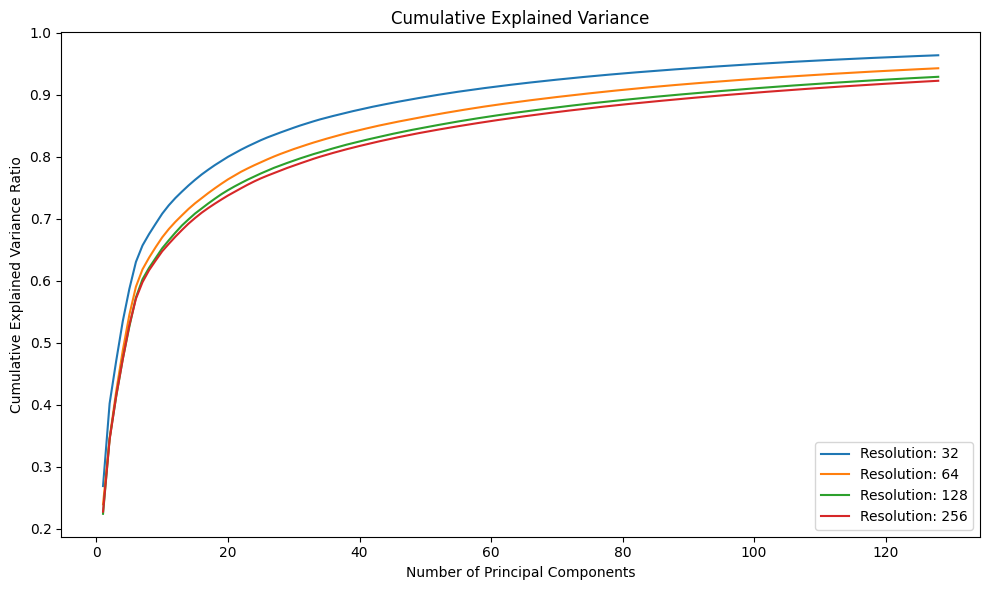

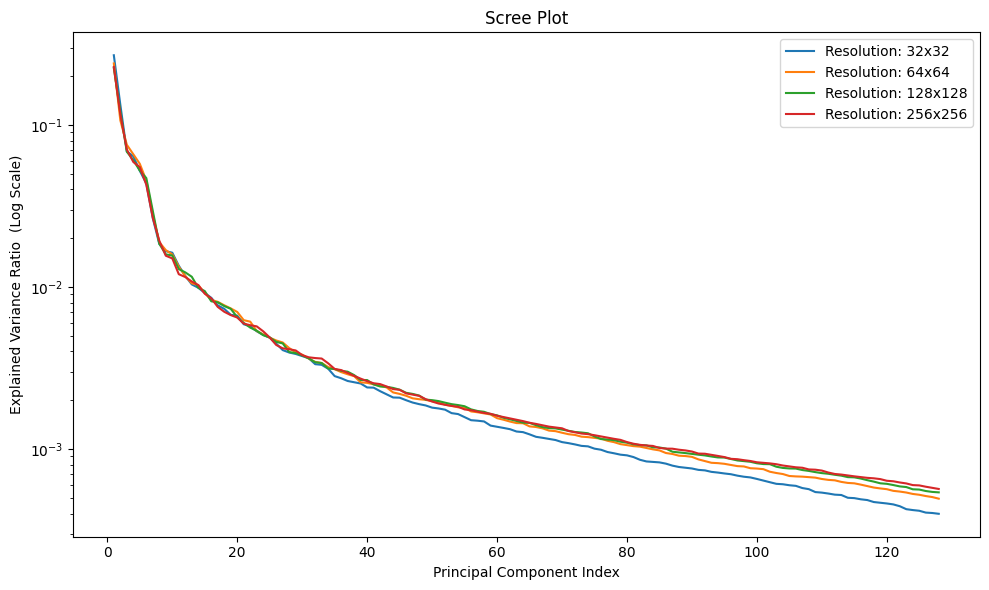

In [12]:
# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))

# Plotting cumulative for each resolution
for resolution in RESOLUTIONS:
    plt.plot(
        range(1, NUM_COMPONENTS + 1),
        pca_results[resolution]['cumulative'],
        label=f'Resolution: {resolution}',
    )

plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Scree Plot
plt.figure(figsize=(10, 6))

for res in RESOLUTIONS:
    plt.plot(
        range(1, NUM_COMPONENTS + 1),
        pca_results[res]['variance'],
        label=f'Resolution: {res}x{res}',
    )

plt.title('Scree Plot')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio  (Log Scale)')
plt.yscale('log') # Log scale helps see the drop-off in detail
plt.legend()
plt.tight_layout()
plt.show()

To analyze the viability of PCA across different input resolutions, we plot two results: explained variance ratio and the its cumulative sum (cumulative explained variance ratio).

Explained variance ratio measures the percentage of the total input variance (ie the difference between a given pixel and every other pixel, for every pixel) captured by a given feature in the output vector. The plot of the cumulative sum of this measure can indicate the density and completness of the embedding. The ideal trendline is a gently curving line from 0 to 1. Obviously, we want the final value to be 1 (or as close to 1 as possible) as this means we've captured all available information; we want the line to grow slowly (not too steep a curve, although a curve is inevitable) because that means each feature is important (and not just noise filling up the required dimension) and contributing to the captured information. If the trendline shoots up and then levels off, even if it reaches a high threshold, this indicates that only global patterns are captured while the smaller, local patterns have been lost. Following our previous assumption that the "deepfake signal" is not a global (relative to a given image) abnormality, it is likely that this signal is contained in the later/smaller features of the embedding. Therefore, we should pay special attention to how much the smaller features are contributing (ie the uniformness of the embedding).

Focusing first on the Cumulative Explained Variance Ratio. All resolution sizes reach about 90% of the total possible information for the given resolution. This is a good sign that the PCA dimension is sufficient. Next, we see that the larger resolution trendlines climb more slowly (have a more uniform embedding) which indicate our "deepfake signal" is more likely to be in 128 or 256 resolution. Finally, we see that the trendlines come closer to convergence as the resolution increases, indicating that, although the larger sizes are capturing more patterns, the relative complexity captured between the larger sizes is nearly equal, so we should probably take the smaller resolution as the additional computation is not necessary (and may be more noisy). This leads to 128 resolution likely being the best choice.
Reviewing the Scree graph, confirms this choice as the per feature weighting overlaps for almost the entirety of the 128 and 256 resolution trendlines, meaning that new patterns are being found between the two resolutions (the higher resolution just has more of the same patterns).

We can additionally use these graphs to estimate where to truncate noise features from the PCA embedding. By choosing a threshold where we assume that the "deepfake signal" is contained in the percent of captured information (cumulative explained variance ratio), we can remove all embeddings following the feature that reaches that threshold. If we assume that the signal is within the 90% of captured information for the 128 resolution, it appears we can truncate after about the 90th embedding.

Overall, these results indicate that PCA is a viable method for the task. The high cumulative explained variance ratios for higher resoltutions show that the embedding size is sufficient for the capturing of even local patterns. And the similarity in slope between those higher resolutions, help identify the optimal level of compression.

(E) Initial Insights and Direction:
- Observation:
    - The dataset contains biases toward different subgroups (by metadata value, ie white adults).
    - The disparity in average gradient between fake and real images likely indicate an anomaly resulting from the generation process.
    - Performing PCA across subsample of real and fake images is capable of capturing both global and local patterns in a dense, managable embedding that can be computed within reasonable hardware and time constraints.
- Hypothesis: Clustering, in combination with PCA embeddings, can be used to detect anomaly patterns in deepfake images.

Potential RQs:
- How to verify (and potentially interpret) whether the PCA embeddings have captured the "deepfake signal" within the cumulative explained variance ratio threshold, and what should that threshold be?
- Which clustering algorithm would be effective for separating the PCA embeddings, and how should the embedding space be populated (what sampling approach)?
- Would a more customized encoder (not PCA) which would allow supervised learning be more effective?
- How to evaluate whether the model can handle samples across all subgroups, and if not, how to correct for the biases.




On my honor, I declare the following resources:
1. Collaborators:
- Gage Mariano: Some code taken from previous homeworks.
2. Web Sources:
- RuleArena:
    - paper: https://arxiv.org/abs/2412.08972
    - GitHub: https://github.com/skyriver-2000/rulearena
- HiDF
    - paper: https://dl.acm.org/doi/10.1145/3711896.3737399
    - Github: https://github.com/DSAIL-SKKU/HiDF
    - Dataset: https://zenodo.org/records/16140829
- EmoryNLP
    - paper: https://arxiv.org/abs/2508.19533
    - Github: https://github.com/KunPunCN/ProEmoTrans/
    - Dataset: https://github.com/emorynlp/emotion-detection
- https://docs.python.org/3/library/os.html: Used as reference for os library functions
- https://pandas.pydata.org/docs/reference: Used as reference for pandas functions  
- https://docs.scipy.org/doc/scipy/reference/index.html: Used as reference for scipy functions
- https://scikit-learn.org/stable/api/sklearn.decomposition.html: PCA, StandardScaler reference
3. AI Tools:  
- Gemini:
    - Summarized all papers, asked to focus on their approaches and the data used. Asked specifically what some "beyond-course" techniques may be applicable.
    - Discussed RuleArena ethical issues.
    - Discussed important EDA techniques/approaches for the domain.
    - Specifically (and extensively) discussed how to verify PCA viability.
    - Partially generated download and graph code.
    - Discussed EDA results and interpretations.
    - Verified all answers.